<a href="https://colab.research.google.com/github/heewoonjeong/AI8_Study/blob/main/titanic%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터 분석 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 데이터 수집 
# Python Pandas 패키지는 데이터세트 작업을 도와줍니다. 
# 훈련 및 테스트 데이터 세트를 Pandas DataFrames로 획득하는 것으로 시작합니다. 
# 또한 이러한 데이터 세트를 결합하여 두 데이터 세트에서 함께 특정 작업을 실행합니다.
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(train_df.columns.values) # 타이타닉의 컬럼을 불러옵니다 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
# 타이타닉 데이터프레임을 불러옵니다 
train_df.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# 숫자 정보가 있는 컬럼에 대한 통계 정보 보여 줌
# 실제 승객수 2240명중 891명 데이터(40%) 
# 평균 생존율은 38% 약 339명이 생존 -1.age 2. pclass 3.sex 4.fare
# 전체 요금의 평균은 32달러였고 최고금액은 512달러 -생존과 요금의 관계
# 승객의 평균연령은 29세 최고령은 80세 고령의 승객 승선 
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# train_df.describe(include=['O'])

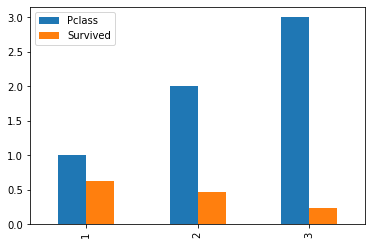

In [59]:
# 클래스별 생존율 
p_suv =train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
p_suv.index = ['1','2','3']
# 등급이 높을수록 생존율이 높음
p_suv.plot(kind='bar')

      Sex  Survived
0  female  0.742038
1    male  0.188908


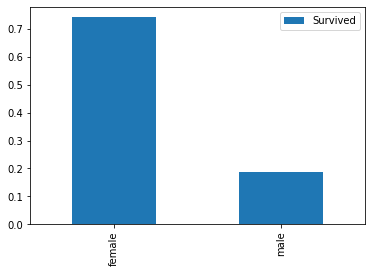

In [64]:
# 성별로 보는 생존율 
f_m = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(f_m)
# 성별 생존율 그래프 
f_m.index = ['female','male']
f_m.plot(kind='bar')

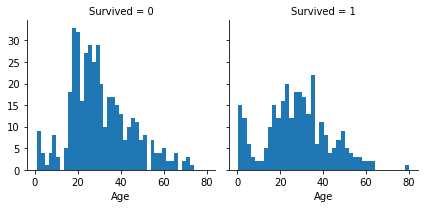

In [11]:
# 나이와 생존의 관계
# 15~30세가 가장많이 죽었다 5미만의 아이들의 생존율이 높았다 
# 15~30세의 승객들이 많았다는걸 알수있음 
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=40)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


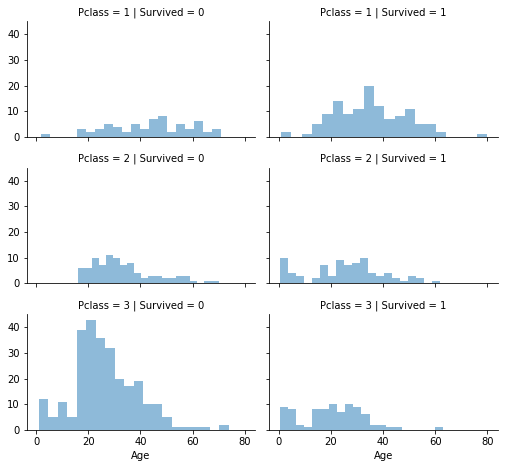

In [12]:
# p클래스별 생존여부, 나이와 생존의 관계
# 1클래스 나이에 관계없이 대부분생존
# 2클래스 유아 승객들은 대부분생존 
# 3클래스 유아이외의 많은 승객들이 높은 확률로 사망 
# 1클래스와 3클래스의 생존 확률의 갭 1클래스와 3클래스의 생존율을 구하진못함.
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


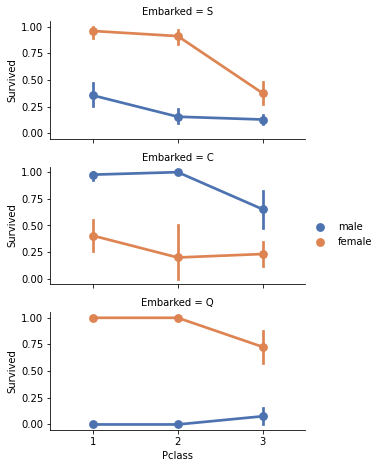

In [13]:
# 항선에 따른 생존 p클래스,성별 그래프
# 여성 승객은 남성보다 높은 확률로 생존 
# 남자의 생존율이 더높은 c항은 예외
# survied 와 승선항과의 상관관계가 있는건아님 
# 남성은 C항선과 Q항선을 비교할때 pclass= 2와 pclass =3 나은 생존을 보였다 
# S.Q항선은 남자들은 여성보다 많이 죽었지만 C항선 남자들은 많이 살아남은 이유(pclass,fare의 관계가 있음)
# grid = sns.FacetGrid(train_df, col='Embarked') 

grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


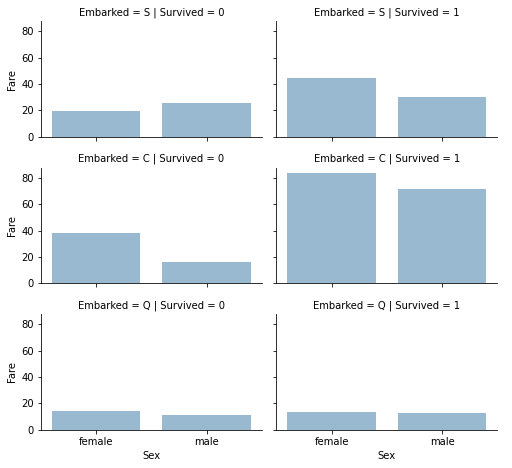

In [14]:
# c 항선에서 비싼요금을 낸 승객들이 높은 확률로 생존 
# q 항선 저렴한 요금을 낸 승객들은 낮은 확률로 생존 
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


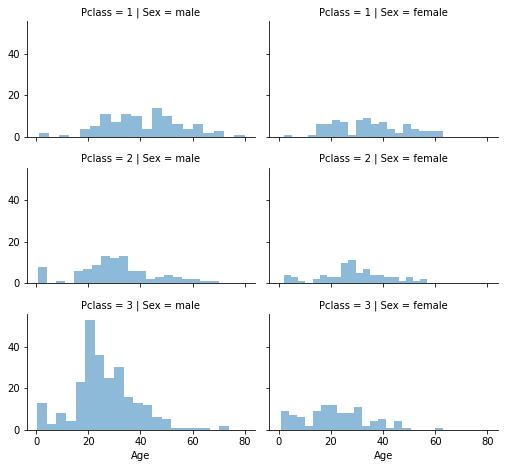

In [65]:
# p클래스별 나이와 성별 인원비율
# p클래스3의 20~30세가 가장많음 3클래스남성인원이 가장많은 죽음과 관련
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna()
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False

In [15]:
# train_df 컬럼의 데이터 nan 값확인 
print(train_df.head().isnull().sum(axis=0))
print(train_df.isnull().sum(axis=0))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
#train_df 데이터 복제
train_df1 = train_df.copy()

In [17]:
# titanic 에서 생존 클래스 나이 성별 컬럼만 추출해서 df 생성
train_df1 = train_df.loc[ : , ['Survived', 'Pclass','Age','Sex','Fare','Embarked']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Sex       891 non-null    object 
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [18]:
# sex컬럼 데이터male.female을 숫자로 변환 
train_df1 =train_df1.replace(['male','female'],[0,1])
train_df1.head()

,Survived,Pclass,Age,Sex,Fare,Embarked
0,0,3,22.0,0,7.2500,S
1,1,1,38.0,1,71.2833,C
2,1,3,26.0,1,7.9250,S
3,1,1,35.0,1,53.1000,S
4,0,3,35.0,0,8.0500,S


In [19]:
# Embarked컬럼 데이터Q,S,C를 숫자로 변환 
train_df1 =train_df1.replace(['Q','S','C'],[0,1,2])
train_df1.head()

,Survived,Pclass,Age,Sex,Fare,Embarked
0,0,3,22.0,0,7.2500,1.0
1,1,1,38.0,1,71.2833,2.0
2,1,3,26.0,1,7.9250,1.0
3,1,1,35.0,1,53.1000,1.0
4,0,3,35.0,0,8.0500,1.0


In [20]:
# Embarked 컬럼 갯수 2개 추가해주기
train_df1['Embarked'].fillna(0, inplace=True)

In [21]:
# df['age'].mean(axis=0)  -> age의 평균으로 치환
# df_2['age'] = df_2['age'].fillna(df['age'].mean(axis=0))
train_df1['Age'] =train_df1['Age'].fillna(train_df1['Age'].mean(axis=0))
train_df1.Age.isnull().value_counts()
train_df1.Age 

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [22]:
# 컬럼 숫자 변환 확인 
train_df1.head()

,Survived,Pclass,Age,Sex,Fare,Embarked
0,0,3,22.0,0,7.2500,1.0
1,1,1,38.0,1,71.2833,2.0
2,1,3,26.0,1,7.9250,1.0
3,1,1,35.0,1,53.1000,1.0
4,0,3,35.0,0,8.0500,1.0


In [23]:
# 정보로 타입확인 개수확인 
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [24]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [25]:
# test 파일 nan값확인 
print(test_df.head().isnull().sum(axis=0))
print(test_df.isnull().sum(axis=0))

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          5
Embarked       0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [26]:
#test_df 정보확인 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
#정보에서 Age 값확인 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
test_df1 = test_df.loc[ : , [ 'Pclass','Age','Sex','Fare','Embarked']]
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       332 non-null    float64
 2   Sex       418 non-null    object 
 3   Fare      417 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 16.5+ KB


In [29]:
# sex컬럼 데이터male.female을 숫자로 변환 
test_df2 =test_df1.replace(['male','female'],[0,1])
test_df2.head()

,Pclass,Age,Sex,Fare,Embarked
0,3,34.5,0,7.8292,Q
1,3,47.0,1,7.0000,S
2,2,62.0,0,9.6875,Q
3,3,27.0,0,8.6625,S
4,3,22.0,1,12.2875,S


In [30]:
# df['age'].mean(axis=0)  -> age의 평균으로 치환
# df_2['age'] = df_2['age'].fillna(df['age'].mean(axis=0))
test_df2['Age'] =test_df2['Age'].fillna(test_df2['Age'].mean(axis=0))
test_df2.Age.isnull().value_counts()
test_df2.Age


0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [31]:
test_df2['Fare'].fillna(0, inplace=True)

In [32]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Sex       418 non-null    int64  
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [33]:
# Embarked컬럼 데이터Q,S,C를 숫자로 변환 
test_df2 =test_df2.replace(['Q','S','C'],[0,1,2])
test_df2.head()

,Pclass,Age,Sex,Fare,Embarked
0,3,34.5,0,7.8292,0
1,3,47.0,1,7.0000,1
2,2,62.0,0,9.6875,0
3,3,27.0,0,8.6625,1
4,3,22.0,1,12.2875,1


In [39]:
train_df1.info()
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Sex       418 non-null    int64  
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [40]:
# 훈련 세트, 테스트세트 설정 
data= train_df1[['Pclass','Age','Sex','Fare','Embarked',]].to_numpy()
target= train_df1['Survived'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =train_test_split(data,target,test_size=0.25)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)
# 전처리한 train데이터 최종적으로 스탠다드 스캐일러 
final=ss.transform(test_df2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [41]:
print(train_input.shape,test_input.shape)

(668, 5) (223, 5)


로지스틱

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(lr,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.7979041916167665
0.8026905829596412
Accuracy: 78.13 %
Standard Deviation: 5.00 %


결정트리 맥스뎁스=3 

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =3)
dtc.fit(train_scaled,train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(dtc,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.8398203592814372
0.7623318385650224
Accuracy: 81.29 %
Standard Deviation: 3.76 %


랜덤 포레스트 

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_scaled,train_target)
print(rf.score(train_scaled, train_target))
print(rf.score(test_scaled, test_target))

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(rf,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.9805389221556886
0.8161434977578476
Accuracy: 80.99 %
Standard Deviation: 2.32 %


가우시안 나이브 베이즈

In [45]:
from sklearn.naive_bayes import GaussianNB
gn= GaussianNB()
gn.fit(train_scaled, train_target)
print(gn.score(train_scaled, train_target))
print(gn.score(test_scaled, test_target)) 

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(gn,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.7904191616766467
0.7668161434977578
Accuracy: 78.59 %
Standard Deviation: 6.38 %


k 최근접이웃

In [46]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target)) 

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(kn,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.8637724550898204
0.7892376681614349
Accuracy: 81.28 %
Standard Deviation: 4.02 %


에이다 부스트

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ac = AdaBoostClassifier()
ac.fit(train_scaled, train_target)
print(ac.score(train_scaled, train_target))
print(ac.score(test_scaled, test_target)) 

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(ac,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.8547904191616766
0.7937219730941704
Accuracy: 80.40 %
Standard Deviation: 4.38 %


이차 판별 분석

In [48]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd = QuadraticDiscriminantAnalysis()
qd.fit(train_scaled, train_target)
print(qd.score(train_scaled, train_target))
print(qd.score(test_scaled, test_target)) 

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(qd,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.8038922155688623
0.7757847533632287
Accuracy: 78.74 %
Standard Deviation: 4.07 %


서포트 벡터 머신

In [49]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(train_scaled, train_target)
print(sv.score(train_scaled, train_target))
print(sv.score(test_scaled, test_target)) 

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(sv,train_scaled,train_target, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.8413173652694611
0.7937219730941704
Accuracy: 83.39 %
Standard Deviation: 3.72 %


In [50]:
test_df2.info()
train_df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Sex       418 non-null    int64  
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [51]:
#결정트리 테스트 모델
qd.predict(final)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
test_df2

,Pclass,Age,Sex,Fare,Embarked
0,3,34.50000,0,7.8292,0
1,3,47.00000,1,7.0000,1
2,2,62.00000,0,9.6875,0
3,3,27.00000,0,8.6625,1
4,3,22.00000,1,12.2875,1
...,...,...,...,...,...
413,3,30.27259,0,8.0500,1
414,1,39.00000,1,108.9000,2
415,3,38.50000,0,7.2500,1
416,3,30.27259,0,8.0500,1


In [53]:
test1= pd.read_csv('./gender_submission.csv')
test1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [54]:
test2 = test1.drop(columns='Survived')
test2.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [55]:
test3 = pd.DataFrame(qd.predict(final), columns=['Survived'])
test3.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [56]:
excel1 = pd.concat([test2,test3],axis=1)
excel1.to_csv('./submissionHW9.csv',index=False)